<a href="https://colab.research.google.com/github/shubshub-bol/personality_predication_model/blob/main/personality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/personality_dataset.csv")

#Clerification :

1) We are not juding people on their personality types (like  which personality is better ) but our only objective is draw solid conclusions from this dataset for the business point of view

2) let's see the defination of Introverts and extroverts so that we all can come on the same page  

   . 🌑 Introvert




Definition: Someone who recharges energy by being alone.

Focus: More inward – their thoughts, feelings, and ideas.

Social Behavior: Can be social, talkative, even confident – but too much external stimulation drains them.

Example: A person who enjoys a deep one-on-one conversation over a party. They might enjoy the party, but feel exhausted afterward.




   .🌕 Extrovert



Definition: Someone who recharges by being around people and activity.

Focus: Outward – external world, people, things.

Social Behavior: Feels more alive when engaging socially, thrives in group settings.

Example: Someone who feels bored or low when alone too long and feels energized in a group discussion.

   #  Features of the given dataset :
* Time_spent_Alone (Numeric): Average time an individual spends alone (in hours).

* Stage_fear (Categorical: Yes/No): Indicates if the individual experiences stage fright.

* Social_event_attendance (Numeric): Number of social events attended recently.

* Going_outside (Numeric): Frequency of going outside for non-essential reasons.

* Drained_after_socializing (Categorical: Yes/No): Shows whether the person feels mentally exhausted after social interaction.

* Friends_circle_size (Numeric): Count of close friends in the individual’s social circle.
* Post_frequency (Numeric): Frequency of social media posting.

* Personality (Target Label: Introvert/Extrovert): Personality classification based on observed traits.

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [4]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
4995,5,No,6,5,No,14,8,Extrovert
4996,7,No,2,3,Yes,2,5,Introvert
4997,2,No,7,3,No,11,3,Extrovert
4998,2,Yes,9,3,No,15,7,Extrovert
4999,4,Yes,6,7,No,12,3,Extrovert


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [6]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4.969000,4.995200,3.523400,7.253200,4.759800
std,3.033922,2.862449,2.088618,4.045783,2.780369
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,5.000000,3.000000
50%,5.000000,5.000000,4.000000,7.000000,5.000000
75%,7.000000,7.000000,5.000000,10.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
print("dataset has been provided after cleaning")
df.isna().sum()


dataset has been provided after cleaning


,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


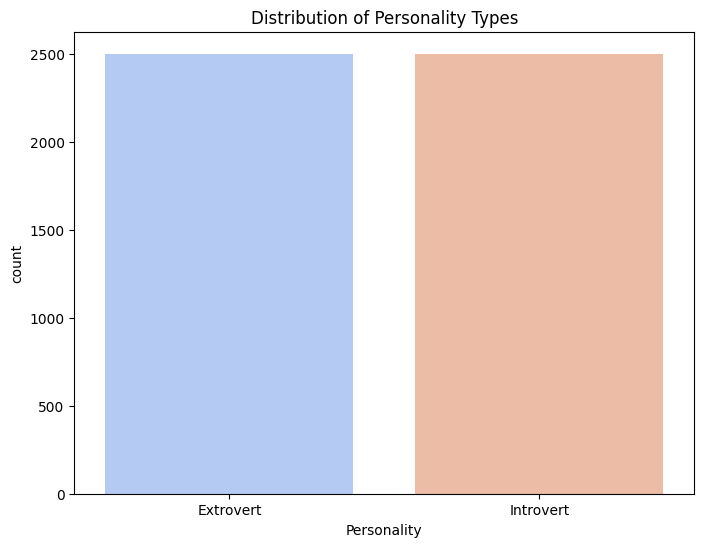

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Personality',palette='coolwarm')
plt.title('Distribution of Personality Types')
plt.show()

###It's an balanced dataset

In [9]:
# Now apply the mapping to the 'Stage_fear' and 'Drained_after_socializing' column
df['Stage_fear'] = df['Stage_fear'].map({"Yes": 1, "No": 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({"Yes": 1, "No": 0})

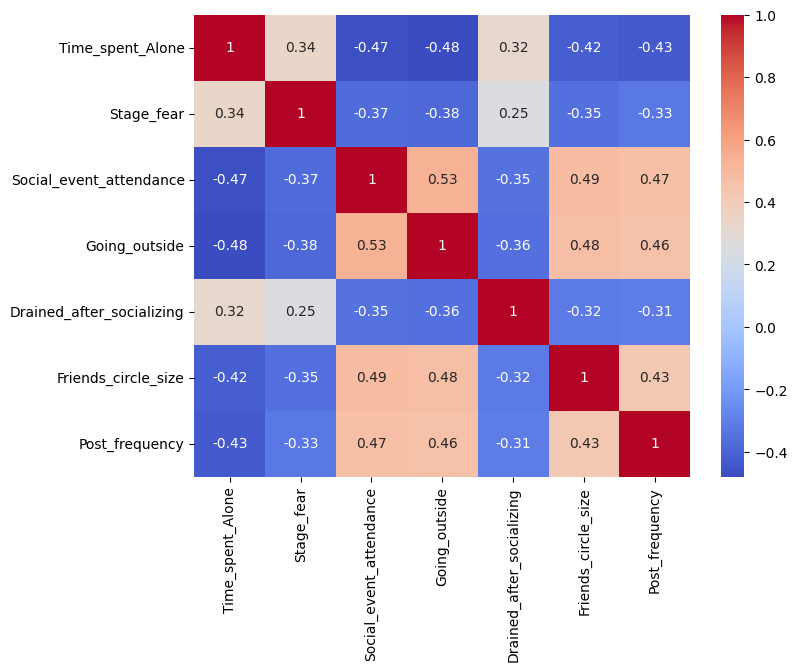

In [10]:
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()



 The correlations are moderate at best (mostly in the ±0.3 – 0.5 range
 meaning no single variable here perfectly explains whether someone is an introvert or extrovert.

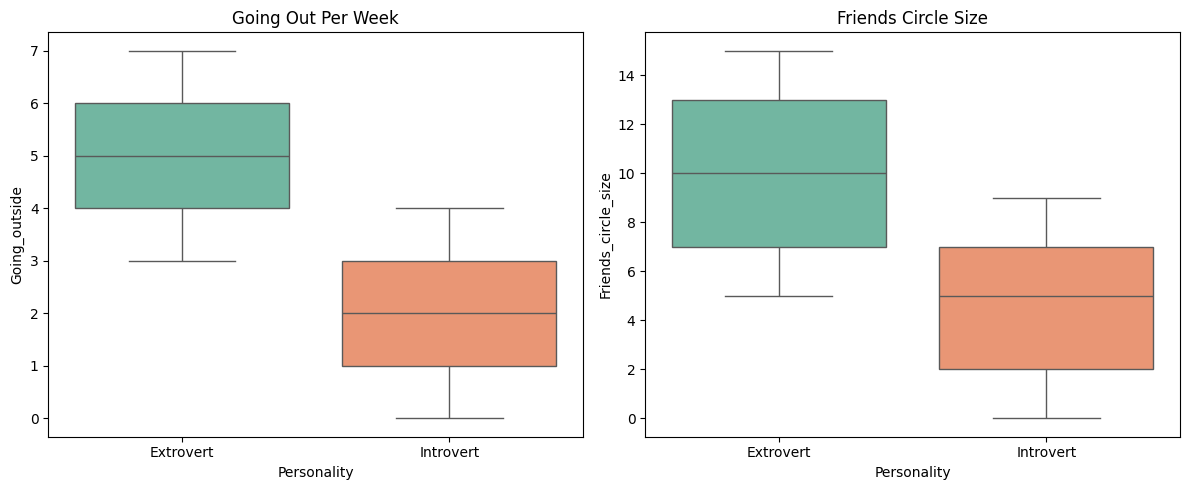

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First plot
sns.boxplot(ax=axes[0], x="Personality", y="Going_outside", data=df, palette="Set2")
axes[0].set_title("Going Out Per Week")

# Second plot
sns.boxplot(ax=axes[1], x="Personality", y="Friends_circle_size", data=df, palette="Set2")
axes[1].set_title("Friends Circle Size")

# Adjust layout
plt.tight_layout()
plt.show()

##So, after looking at the plot we can say Extrovert personalities tends to go out more than Introverts and they have more friends in general

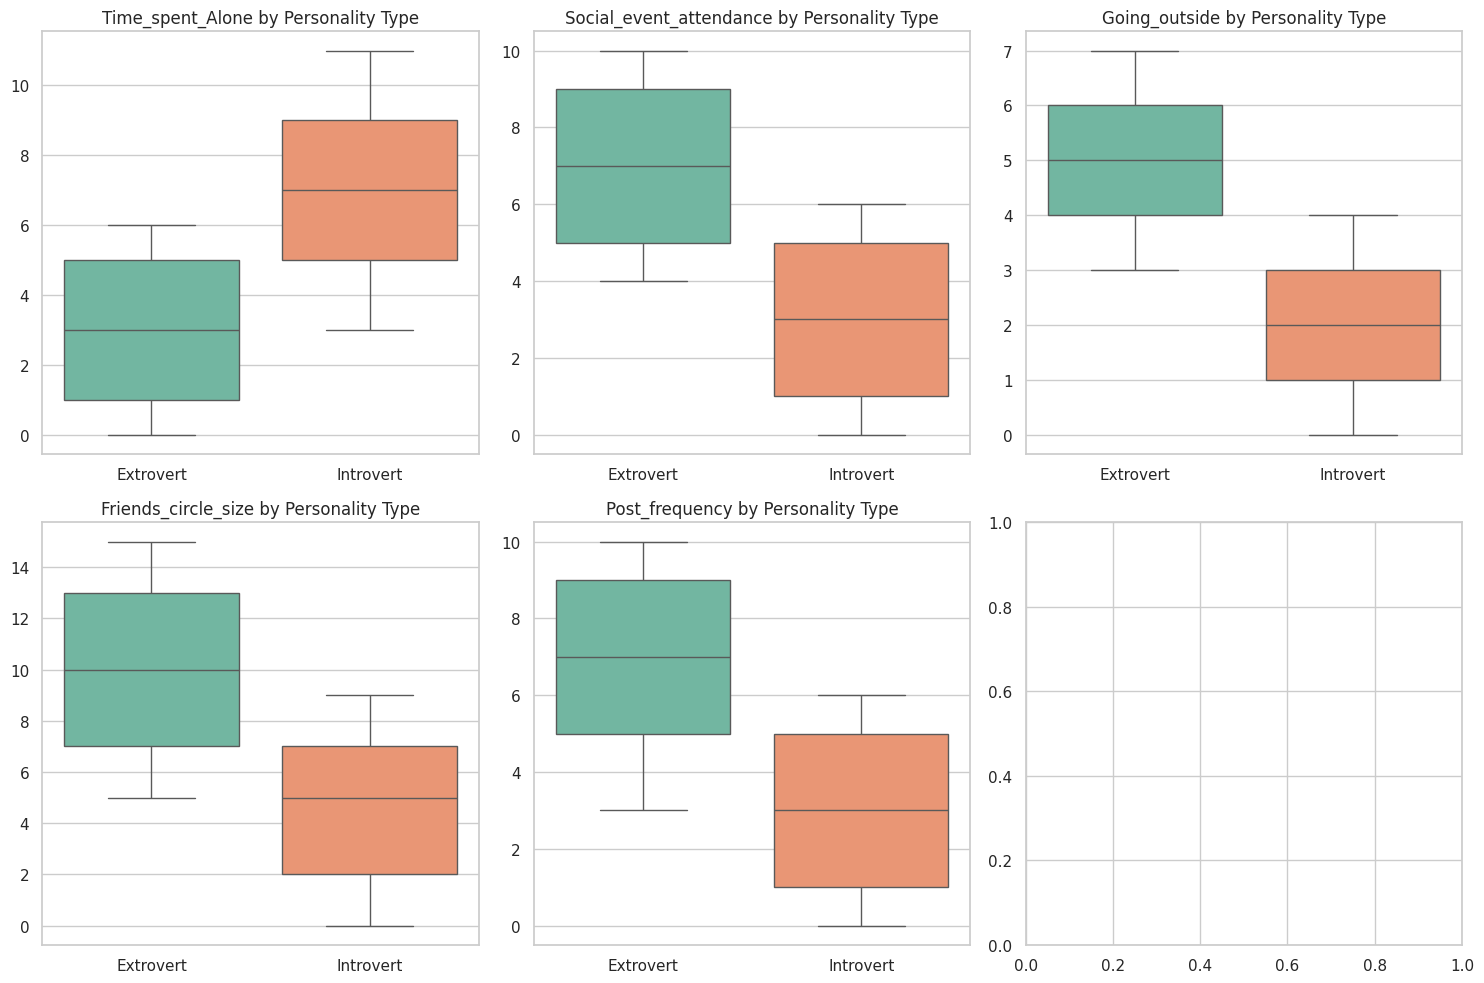

In [12]:
# Set a colorful theme
sns.set_theme(style="whitegrid")

# Pick a bright or pastel palette
colors = sns.color_palette("Set2")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                               'Friends_circle_size', 'Post_frequency']):
    sns.boxplot(
        data=df,
        x='Personality',
        y=feature,
        ax=axes[idx],
        palette=colors
    )
    axes[idx].set_title(f'{feature} by Personality Type', fontsize=12)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")

plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# splitting the dataset
X = df.drop('Personality',axis=1)
y = df['Personality']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print()
    print(classification_report(y_test, y_pred))
    print(" ")


=== Logistic Regression ===

              precision    recall  f1-score   support

   Extrovert       0.99      1.00      1.00       504
   Introvert       1.00      0.99      0.99       496

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000

 
=== Decision Tree ===

              precision    recall  f1-score   support

   Extrovert       0.99      1.00      1.00       504
   Introvert       1.00      0.99      0.99       496

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000

 
=== Random Forest ===

              precision    recall  f1-score   support

   Extrovert       0.99      1.00      1.00       504
   Introvert       1.00      0.99      1.00       496

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      

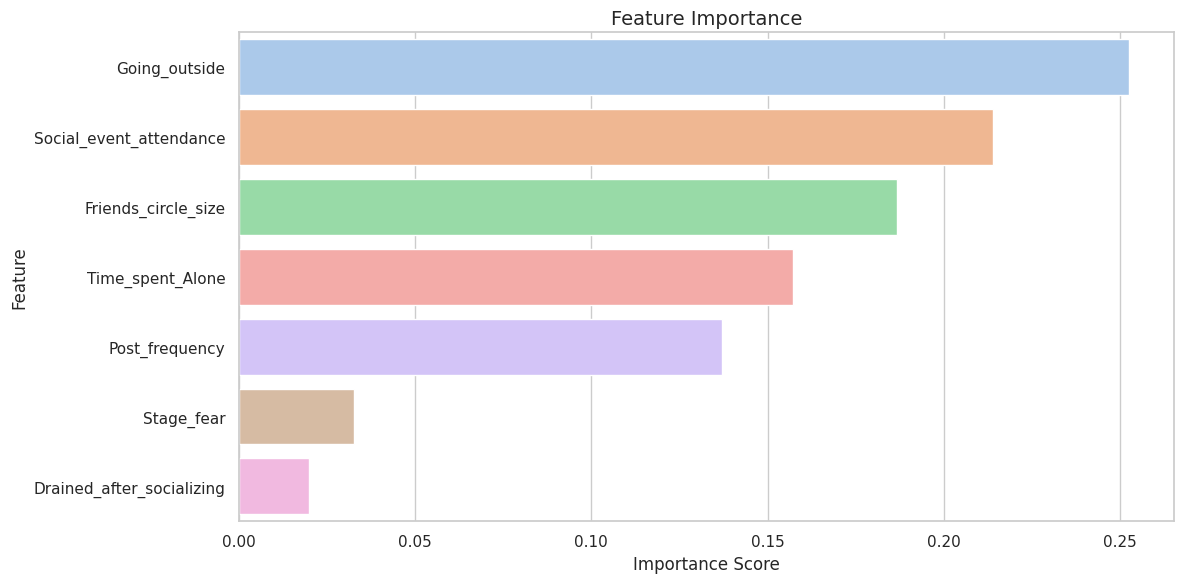

In [14]:
from sklearn.ensemble import RandomForestClassifier

# 1. Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# 2. DataFrame for feature importance
feat_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# 3. Styling
sns.set_theme(style="whitegrid")  # White grid + soft colors

# 4. Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='importance',
    y='feature',
    data=feat_importances_df,
    palette='pastel'  # Exact pastel style
)

# 5. Title & layout
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## for going out you need friends but to have friends you have to go out